In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from scipy.sparse import hstack

In [2]:
# Load dataset
df = pd.read_csv("profanity_en.csv").fillna("")

# Combine text inputs
text_data = df["text"] + " " + df["canonical_form_1"] + " " + df["canonical_form_2"] + " " + df["canonical_form_3"]

# Encode category features
categorical_data = df[["category_1", "category_2", "category_3"]]
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=True)
categorical_encoded = onehot_encoder.fit_transform(categorical_data)

In [3]:
# TF-IDF for text
tfidf_vectorizer = TfidfVectorizer()
text_tfidf = tfidf_vectorizer.fit_transform(text_data)

# Combine features
X = hstack([text_tfidf, categorical_encoded])

# Encode target
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["severity_description"])

In [4]:
# Models
classifiers = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(eval_metric='mlogloss'),
    "K-Nearest Neighbor": KNeighborsClassifier()
}

In [5]:
# Metrics storage
results = {name: {"accuracy": [], "precision": [], "recall": [], "specificity": [], "f1": [], "y_true": [], "y_pred": []} for name in classifiers}

# 10-fold cross-validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

conf_matrices = {name: np.zeros((len(np.unique(y)), len(np.unique(y)))) for name in classifiers}

=        Naive Bayes         =

-- Fold 1 --
Accuracy:      0.6500
Precision:     0.7095
Recall:        0.6137 (Sensitivity)
Specificity:   0.8015
F1 Score:      0.6351

Classification Report:
              precision    recall  f1-score   support

        Mild       0.75      0.49      0.59        43
      Severe       0.80      0.52      0.63        46
      Strong       0.58      0.83      0.68        71

    accuracy                           0.65       160
   macro avg       0.71      0.61      0.64       160
weighted avg       0.69      0.65      0.64       160



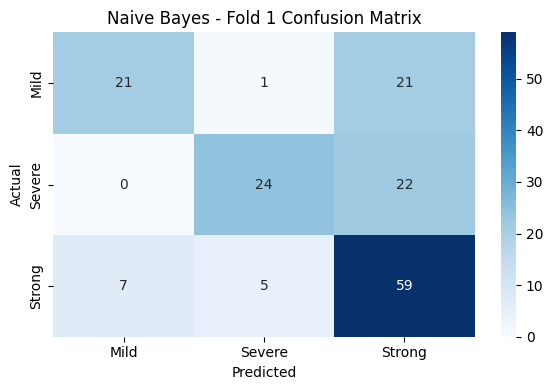


-- Fold 2 --
Accuracy:      0.6438
Precision:     0.6894
Recall:        0.6136 (Sensitivity)
Specificity:   0.8002
F1 Score:      0.6322

Classification Report:
              precision    recall  f1-score   support

        Mild       0.74      0.47      0.57        43
      Severe       0.75      0.59      0.66        46
      Strong       0.58      0.79      0.67        71

    accuracy                           0.64       160
   macro avg       0.69      0.61      0.63       160
weighted avg       0.67      0.64      0.64       160



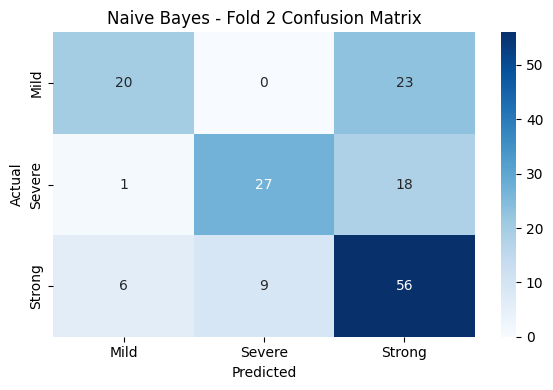


-- Fold 3 --
Accuracy:      0.6188
Precision:     0.6729
Recall:        0.5652 (Sensitivity)
Specificity:   0.7825
F1 Score:      0.5719

Classification Report:
              precision    recall  f1-score   support

        Mild       0.69      0.26      0.38        42
      Severe       0.77      0.57      0.66        47
      Strong       0.56      0.86      0.68        71

    accuracy                           0.62       160
   macro avg       0.67      0.57      0.57       160
weighted avg       0.66      0.62      0.59       160



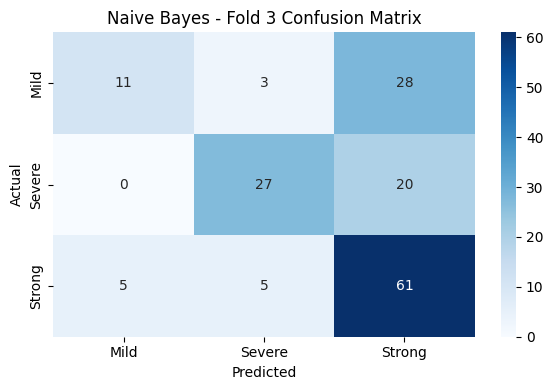


-- Fold 4 --
Accuracy:      0.5625
Precision:     0.6334
Recall:        0.5136 (Sensitivity)
Specificity:   0.7497
F1 Score:      0.5262

Classification Report:
              precision    recall  f1-score   support

        Mild       0.74      0.40      0.52        42
      Severe       0.65      0.32      0.43        47
      Strong       0.51      0.82      0.63        71

    accuracy                           0.56       160
   macro avg       0.63      0.51      0.53       160
weighted avg       0.61      0.56      0.54       160



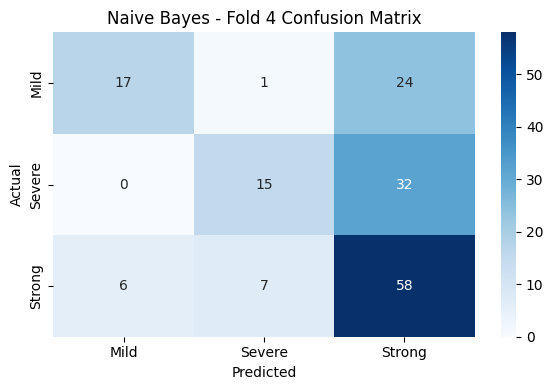


-- Fold 5 --
Accuracy:      0.6312
Precision:     0.6827
Recall:        0.5908 (Sensitivity)
Specificity:   0.7912
F1 Score:      0.6088

Classification Report:
              precision    recall  f1-score   support

        Mild       0.67      0.38      0.48        42
      Severe       0.82      0.57      0.68        47
      Strong       0.56      0.82      0.67        71

    accuracy                           0.63       160
   macro avg       0.68      0.59      0.61       160
weighted avg       0.67      0.63      0.62       160



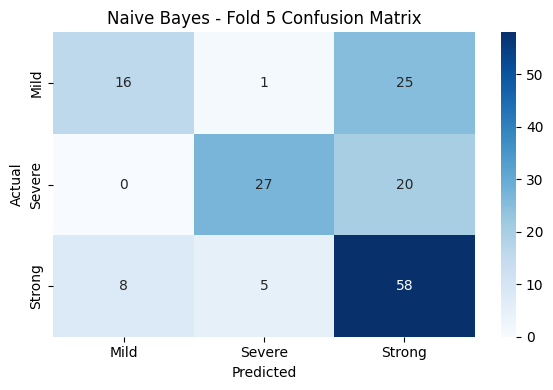


-- Fold 6 --
Accuracy:      0.6375
Precision:     0.6982
Recall:        0.5786 (Sensitivity)
Specificity:   0.7887
F1 Score:      0.5880

Classification Report:
              precision    recall  f1-score   support

        Mild       0.62      0.24      0.34        42
      Severe       0.90      0.61      0.73        46
      Strong       0.57      0.89      0.69        72

    accuracy                           0.64       160
   macro avg       0.70      0.58      0.59       160
weighted avg       0.68      0.64      0.61       160



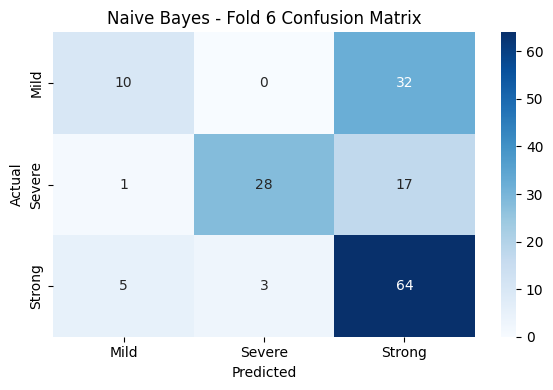


-- Fold 7 --
Accuracy:      0.6375
Precision:     0.7010
Recall:        0.5992 (Sensitivity)
Specificity:   0.7922
F1 Score:      0.6217

Classification Report:
              precision    recall  f1-score   support

        Mild       0.75      0.50      0.60        42
      Severe       0.79      0.48      0.59        46
      Strong       0.57      0.82      0.67        72

    accuracy                           0.64       160
   macro avg       0.70      0.60      0.62       160
weighted avg       0.68      0.64      0.63       160



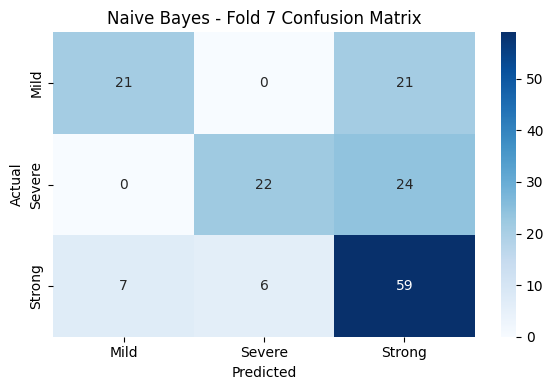


-- Fold 8 --
Accuracy:      0.6250
Precision:     0.6737
Recall:        0.5820 (Sensitivity)
Specificity:   0.7866
F1 Score:      0.6007

Classification Report:
              precision    recall  f1-score   support

        Mild       0.65      0.40      0.50        42
      Severe       0.80      0.52      0.63        46
      Strong       0.57      0.82      0.67        72

    accuracy                           0.62       160
   macro avg       0.67      0.58      0.60       160
weighted avg       0.66      0.62      0.61       160



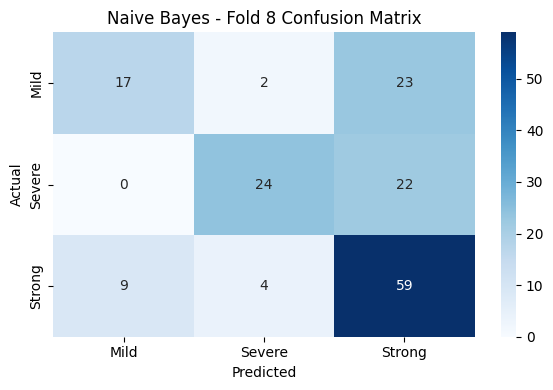


-- Fold 9 --
Accuracy:      0.5912
Precision:     0.6459
Recall:        0.5357 (Sensitivity)
Specificity:   0.7656
F1 Score:      0.5469

Classification Report:
              precision    recall  f1-score   support

        Mild       0.55      0.26      0.35        42
      Severe       0.85      0.50      0.63        46
      Strong       0.54      0.85      0.66        71

    accuracy                           0.59       159
   macro avg       0.65      0.54      0.55       159
weighted avg       0.63      0.59      0.57       159



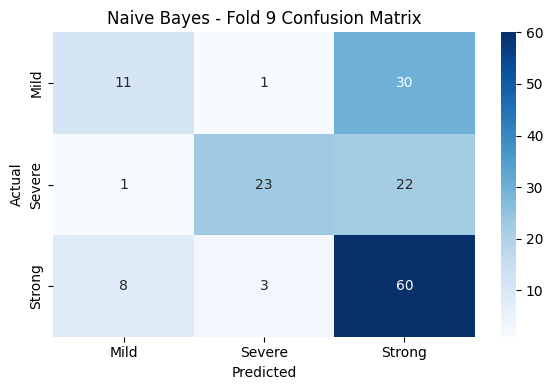


-- Fold 10 --
Accuracy:      0.5912
Precision:     0.6509
Recall:        0.5435 (Sensitivity)
Specificity:   0.7685
F1 Score:      0.5601

Classification Report:
              precision    recall  f1-score   support

        Mild       0.54      0.36      0.43        42
      Severe       0.88      0.46      0.60        46
      Strong       0.54      0.82      0.65        71

    accuracy                           0.59       159
   macro avg       0.65      0.54      0.56       159
weighted avg       0.64      0.59      0.58       159



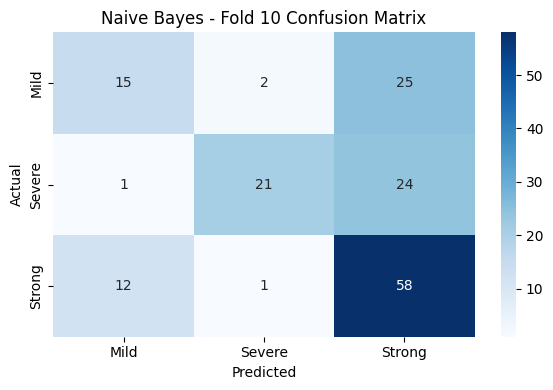

=        Naive Bayes         =
Average Accuracy:      0.6189
Average Precision:     0.6757
Average Recall:        0.5736 (Sensitivity)
Average Specificity:   0.7827
Average F1 Score:      0.5892

Classification Report:
             precision recall specificity f1-score support
Mild              0.67   0.38        0.93     0.48  422.00
Severe            0.80   0.51        0.95     0.63  463.00
Strong            0.56   0.83        0.47     0.67  713.00
                                                          
accuracy          0.62   0.62        0.62     0.62    0.62
macro avg         0.68   0.57        0.78     0.59 1598.00
weighted avg      0.66   0.62        0.73     0.61 1598.00


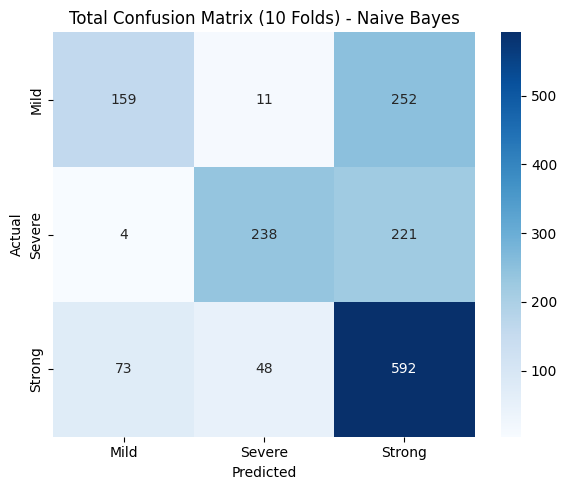

=    Logistic Regression     =

-- Fold 1 --
Accuracy:      0.6813
Precision:     0.6816
Recall:        0.6953 (Sensitivity)
Specificity:   0.8349
F1 Score:      0.6872

Classification Report:
              precision    recall  f1-score   support

        Mild       0.64      0.70      0.67        43
      Severe       0.73      0.78      0.76        46
      Strong       0.67      0.61      0.64        71

    accuracy                           0.68       160
   macro avg       0.68      0.70      0.69       160
weighted avg       0.68      0.68      0.68       160



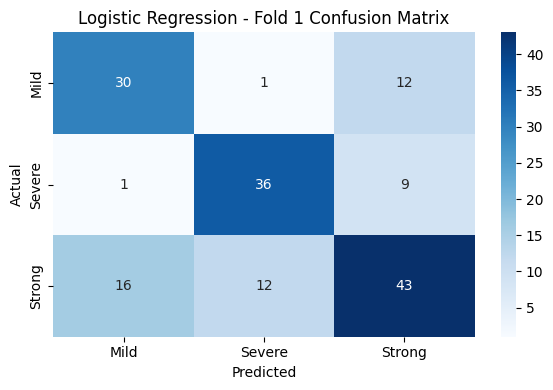


-- Fold 2 --
Accuracy:      0.7625
Precision:     0.7598
Recall:        0.7732 (Sensitivity)
Specificity:   0.8783
F1 Score:      0.7650

Classification Report:
              precision    recall  f1-score   support

        Mild       0.73      0.77      0.75        43
      Severe       0.76      0.85      0.80        46
      Strong       0.78      0.70      0.74        71

    accuracy                           0.76       160
   macro avg       0.76      0.77      0.76       160
weighted avg       0.76      0.76      0.76       160



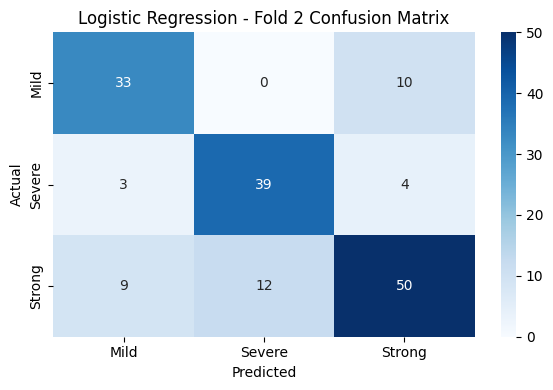


-- Fold 3 --
Accuracy:      0.6813
Precision:     0.6785
Recall:        0.6660 (Sensitivity)
Specificity:   0.8287
F1 Score:      0.6650

Classification Report:
              precision    recall  f1-score   support

        Mild       0.62      0.43      0.51        42
      Severe       0.77      0.85      0.81        47
      Strong       0.65      0.72      0.68        71

    accuracy                           0.68       160
   macro avg       0.68      0.67      0.67       160
weighted avg       0.68      0.68      0.67       160



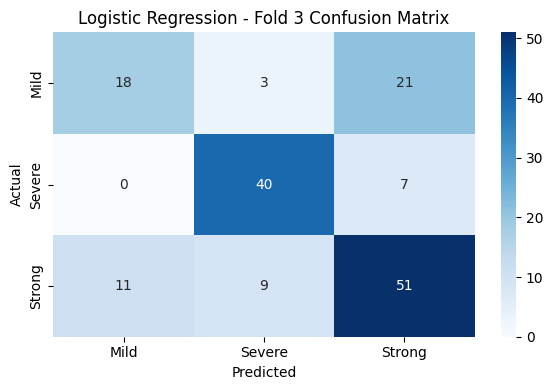


-- Fold 4 --
Accuracy:      0.6937
Precision:     0.6960
Recall:        0.6917 (Sensitivity)
Specificity:   0.8380
F1 Score:      0.6935

Classification Report:
              precision    recall  f1-score   support

        Mild       0.67      0.62      0.64        42
      Severe       0.75      0.77      0.76        47
      Strong       0.67      0.69      0.68        71

    accuracy                           0.69       160
   macro avg       0.70      0.69      0.69       160
weighted avg       0.69      0.69      0.69       160



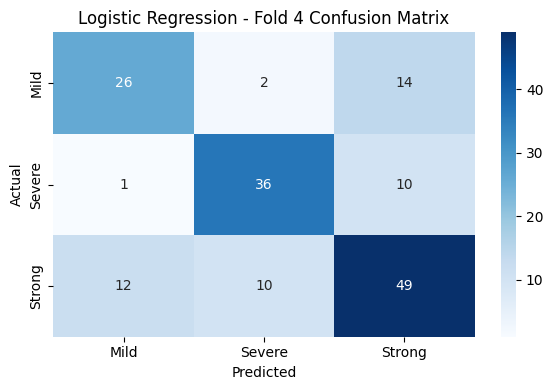


-- Fold 5 --
Accuracy:      0.6438
Precision:     0.6451
Recall:        0.6468 (Sensitivity)
Specificity:   0.8116
F1 Score:      0.6455

Classification Report:
              precision    recall  f1-score   support

        Mild       0.59      0.55      0.57        42
      Severe       0.74      0.79      0.76        47
      Strong       0.61      0.61      0.61        71

    accuracy                           0.64       160
   macro avg       0.65      0.65      0.65       160
weighted avg       0.64      0.64      0.64       160



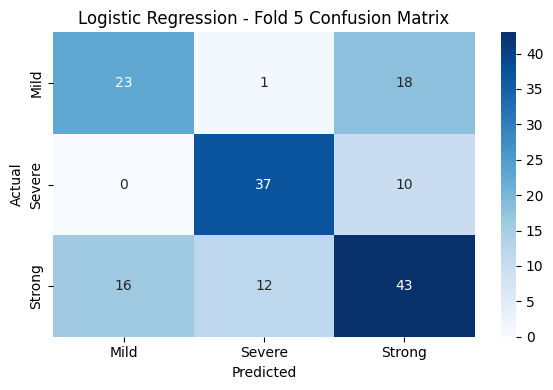


-- Fold 6 --
Accuracy:      0.6875
Precision:     0.7059
Recall:        0.6637 (Sensitivity)
Specificity:   0.8269
F1 Score:      0.6733

Classification Report:
              precision    recall  f1-score   support

        Mild       0.70      0.45      0.55        42
      Severe       0.78      0.76      0.77        46
      Strong       0.64      0.78      0.70        72

    accuracy                           0.69       160
   macro avg       0.71      0.66      0.67       160
weighted avg       0.69      0.69      0.68       160



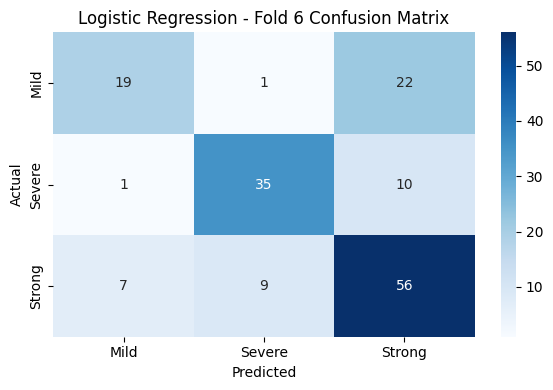


-- Fold 7 --
Accuracy:      0.7625
Precision:     0.7606
Recall:        0.7812 (Sensitivity)
Specificity:   0.8783
F1 Score:      0.7680

Classification Report:
              precision    recall  f1-score   support

        Mild       0.69      0.79      0.73        42
      Severe       0.82      0.89      0.85        46
      Strong       0.77      0.67      0.72        72

    accuracy                           0.76       160
   macro avg       0.76      0.78      0.77       160
weighted avg       0.76      0.76      0.76       160



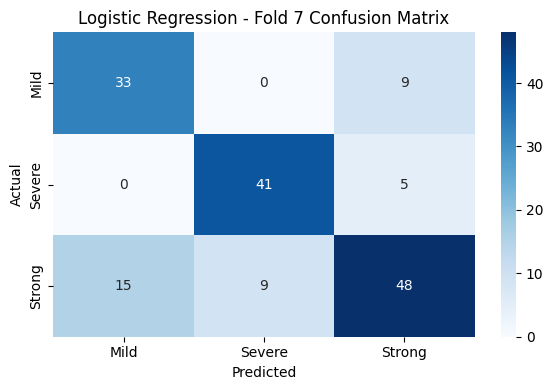


-- Fold 8 --
Accuracy:      0.7188
Precision:     0.7205
Recall:        0.7185 (Sensitivity)
Specificity:   0.8508
F1 Score:      0.7195

Classification Report:
              precision    recall  f1-score   support

        Mild       0.66      0.64      0.65        42
      Severe       0.80      0.80      0.80        46
      Strong       0.70      0.71      0.70        72

    accuracy                           0.72       160
   macro avg       0.72      0.72      0.72       160
weighted avg       0.72      0.72      0.72       160



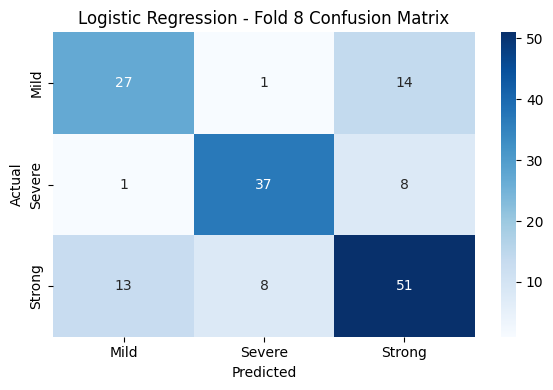


-- Fold 9 --
Accuracy:      0.7358
Precision:     0.7337
Recall:        0.7305 (Sensitivity)
Specificity:   0.8607
F1 Score:      0.7318

Classification Report:
              precision    recall  f1-score   support

        Mild       0.67      0.62      0.64        42
      Severe       0.81      0.83      0.82        46
      Strong       0.73      0.75      0.74        71

    accuracy                           0.74       159
   macro avg       0.73      0.73      0.73       159
weighted avg       0.73      0.74      0.73       159



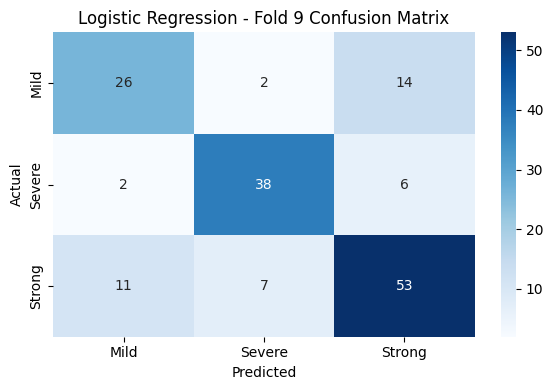


-- Fold 10 --
Accuracy:      0.6855
Precision:     0.6937
Recall:        0.6839 (Sensitivity)
Specificity:   0.8345
F1 Score:      0.6880

Classification Report:
              precision    recall  f1-score   support

        Mild       0.53      0.57      0.55        42
      Severe       0.88      0.80      0.84        46
      Strong       0.67      0.68      0.67        71

    accuracy                           0.69       159
   macro avg       0.69      0.68      0.69       159
weighted avg       0.69      0.69      0.69       159



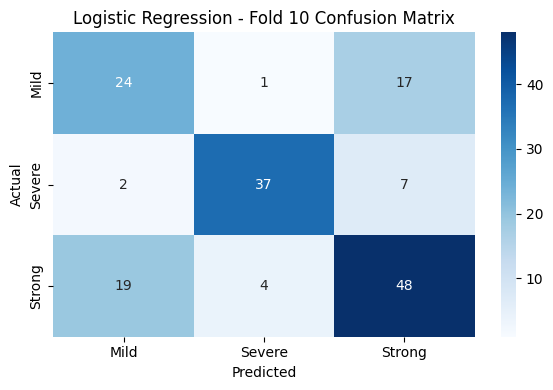

=    Logistic Regression     =
Average Accuracy:      0.7053
Average Precision:     0.7075
Average Recall:        0.7051 (Sensitivity)
Average Specificity:   0.8443
Average F1 Score:      0.7037

Classification Report:
             precision recall specificity f1-score support
Mild              0.65   0.61        0.88     0.63  422.00
Severe            0.78   0.81        0.91     0.80  463.00
Strong            0.68   0.69        0.74     0.69  713.00
                                                          
accuracy          0.71   0.71        0.71     0.71    0.71
macro avg         0.71   0.71        0.84     0.71 1598.00
weighted avg      0.70   0.71        0.83     0.70 1598.00


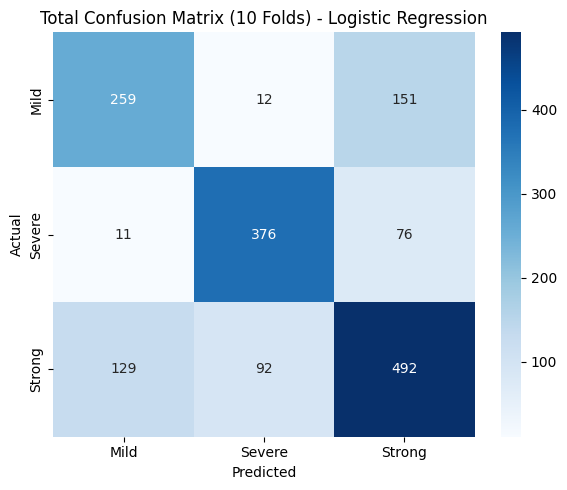

=       Random Forest        =

-- Fold 1 --
Accuracy:      0.7688
Precision:     0.7703
Recall:        0.8013 (Sensitivity)
Specificity:   0.8864
F1 Score:      0.7736

Classification Report:
              precision    recall  f1-score   support

        Mild       0.72      0.91      0.80        43
      Severe       0.75      0.89      0.81        46
      Strong       0.84      0.61      0.70        71

    accuracy                           0.77       160
   macro avg       0.77      0.80      0.77       160
weighted avg       0.78      0.77      0.76       160



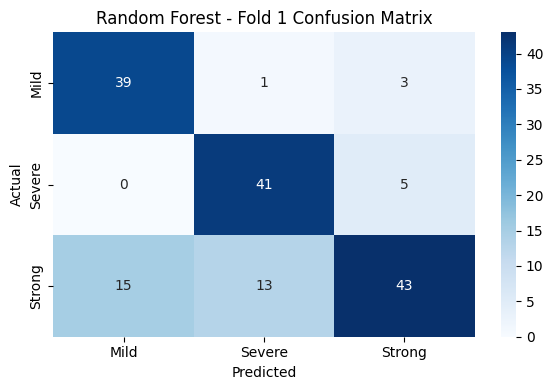


-- Fold 2 --
Accuracy:      0.7875
Precision:     0.7844
Recall:        0.8011 (Sensitivity)
Specificity:   0.8924
F1 Score:      0.7903

Classification Report:
              precision    recall  f1-score   support

        Mild       0.77      0.84      0.80        43
      Severe       0.76      0.85      0.80        46
      Strong       0.82      0.72      0.77        71

    accuracy                           0.79       160
   macro avg       0.78      0.80      0.79       160
weighted avg       0.79      0.79      0.79       160



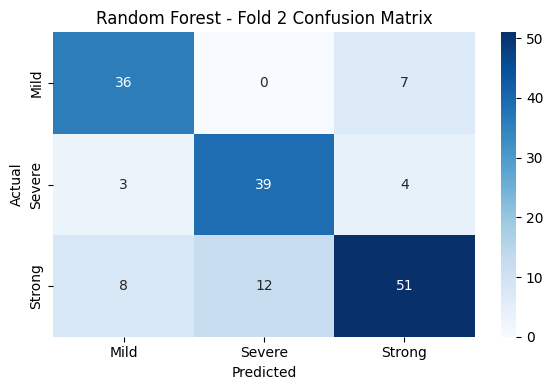


-- Fold 3 --
Accuracy:      0.6937
Precision:     0.6915
Recall:        0.6998 (Sensitivity)
Specificity:   0.8408
F1 Score:      0.6952

Classification Report:
              precision    recall  f1-score   support

        Mild       0.63      0.64      0.64        42
      Severe       0.76      0.81      0.78        47
      Strong       0.69      0.65      0.67        71

    accuracy                           0.69       160
   macro avg       0.69      0.70      0.70       160
weighted avg       0.69      0.69      0.69       160



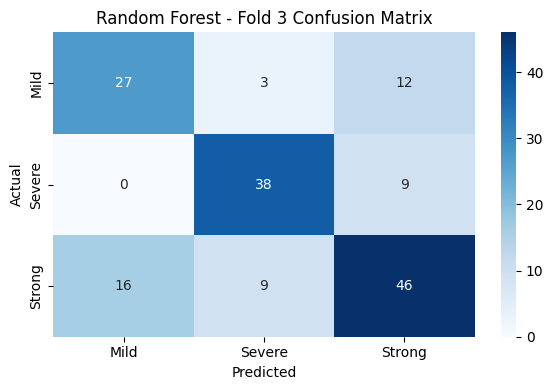


-- Fold 4 --
Accuracy:      0.7500
Precision:     0.7483
Recall:        0.7623 (Sensitivity)
Specificity:   0.8718
F1 Score:      0.7535

Classification Report:
              precision    recall  f1-score   support

        Mild       0.71      0.81      0.76        42
      Severe       0.77      0.79      0.78        47
      Strong       0.77      0.69      0.73        71

    accuracy                           0.75       160
   macro avg       0.75      0.76      0.75       160
weighted avg       0.75      0.75      0.75       160



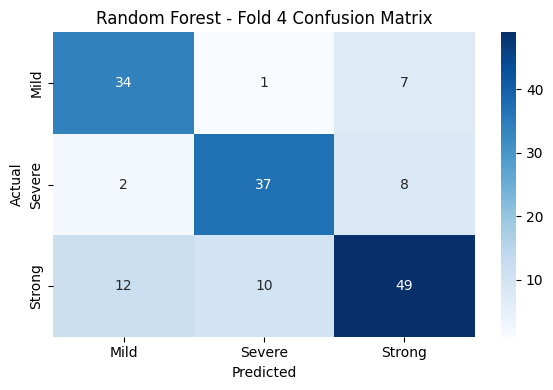


-- Fold 5 --
Accuracy:      0.6875
Precision:     0.6882
Recall:        0.6959 (Sensitivity)
Specificity:   0.8371
F1 Score:      0.6916

Classification Report:
              precision    recall  f1-score   support

        Mild       0.62      0.67      0.64        42
      Severe       0.77      0.79      0.78        47
      Strong       0.67      0.63      0.65        71

    accuracy                           0.69       160
   macro avg       0.69      0.70      0.69       160
weighted avg       0.69      0.69      0.69       160



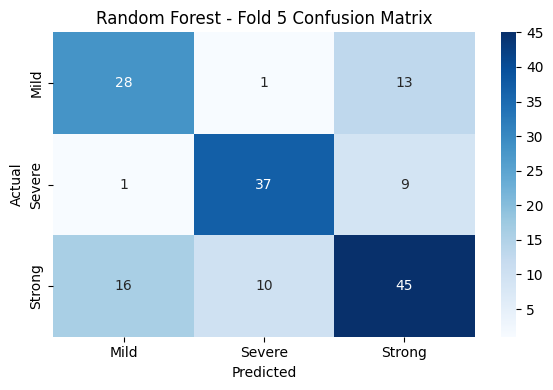


-- Fold 6 --
Accuracy:      0.7375
Precision:     0.7678
Recall:        0.7146 (Sensitivity)
Specificity:   0.8527
F1 Score:      0.7312

Classification Report:
              precision    recall  f1-score   support

        Mild       0.80      0.57      0.67        42
      Severe       0.83      0.74      0.78        46
      Strong       0.67      0.83      0.75        72

    accuracy                           0.74       160
   macro avg       0.77      0.71      0.73       160
weighted avg       0.75      0.74      0.74       160



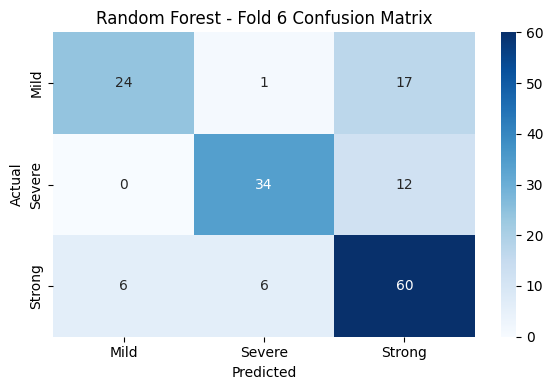


-- Fold 7 --
Accuracy:      0.7812
Precision:     0.7815
Recall:        0.8083 (Sensitivity)
Specificity:   0.8916
F1 Score:      0.7865

Classification Report:
              precision    recall  f1-score   support

        Mild       0.69      0.88      0.77        42
      Severe       0.82      0.89      0.85        46
      Strong       0.84      0.65      0.73        72

    accuracy                           0.78       160
   macro avg       0.78      0.81      0.79       160
weighted avg       0.79      0.78      0.78       160



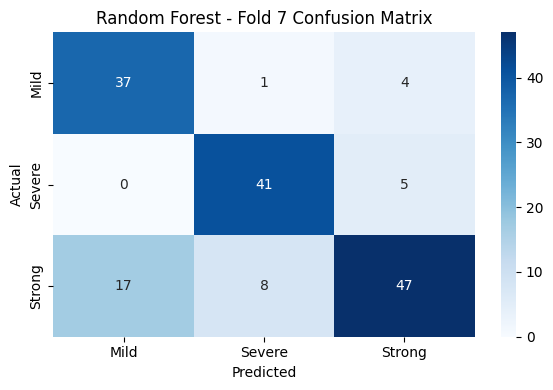


-- Fold 8 --
Accuracy:      0.7438
Precision:     0.7485
Recall:        0.7497 (Sensitivity)
Specificity:   0.8651
F1 Score:      0.7471

Classification Report:
              precision    recall  f1-score   support

        Mild       0.71      0.81      0.76        42
      Severe       0.80      0.72      0.76        46
      Strong       0.73      0.72      0.73        72

    accuracy                           0.74       160
   macro avg       0.75      0.75      0.75       160
weighted avg       0.75      0.74      0.74       160



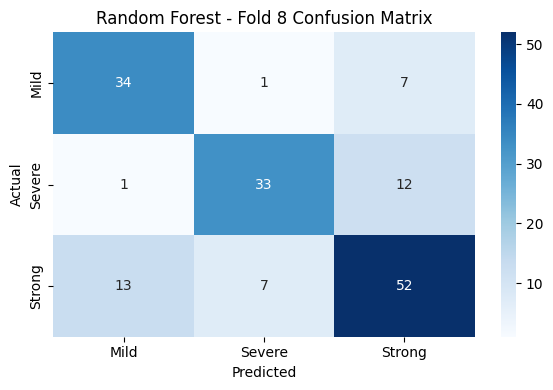


-- Fold 9 --
Accuracy:      0.7547
Precision:     0.7566
Recall:        0.7479 (Sensitivity)
Specificity:   0.8693
F1 Score:      0.7515

Classification Report:
              precision    recall  f1-score   support

        Mild       0.71      0.64      0.68        42
      Severe       0.83      0.83      0.83        46
      Strong       0.73      0.77      0.75        71

    accuracy                           0.75       159
   macro avg       0.76      0.75      0.75       159
weighted avg       0.75      0.75      0.75       159



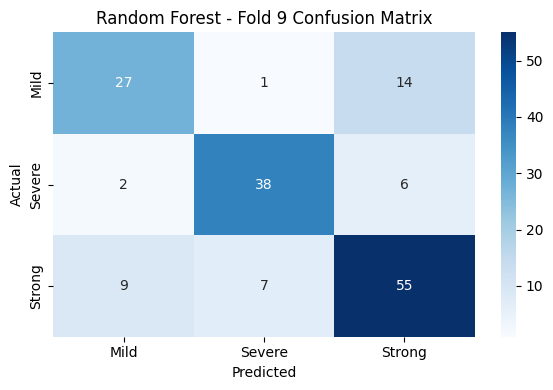


-- Fold 10 --
Accuracy:      0.7233
Precision:     0.7368
Recall:        0.7265 (Sensitivity)
Specificity:   0.8564
F1 Score:      0.7277

Classification Report:
              precision    recall  f1-score   support

        Mild       0.59      0.71      0.65        42
      Severe       0.90      0.76      0.82        46
      Strong       0.72      0.70      0.71        71

    accuracy                           0.72       159
   macro avg       0.74      0.73      0.73       159
weighted avg       0.74      0.72      0.73       159



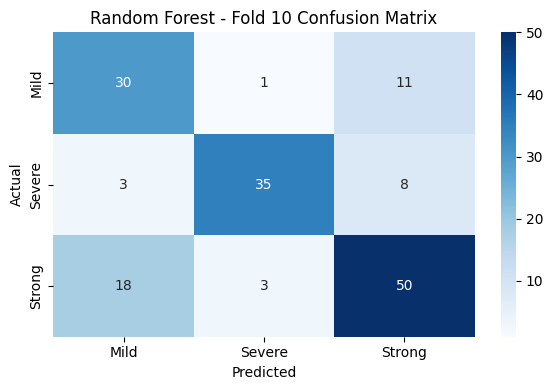

=       Random Forest        =
Average Accuracy:      0.7428
Average Precision:     0.7474
Average Recall:        0.7507 (Sensitivity)
Average Specificity:   0.8664
Average F1 Score:      0.7448

Classification Report:
             precision recall specificity f1-score support
Mild              0.69   0.75        0.88     0.72  422.00
Severe            0.80   0.81        0.92     0.80  463.00
Strong            0.74   0.70        0.80     0.72  713.00
                                                          
accuracy          0.74   0.74        0.74     0.74    0.74
macro avg         0.74   0.75        0.87     0.75 1598.00
weighted avg      0.74   0.74        0.86     0.74 1598.00


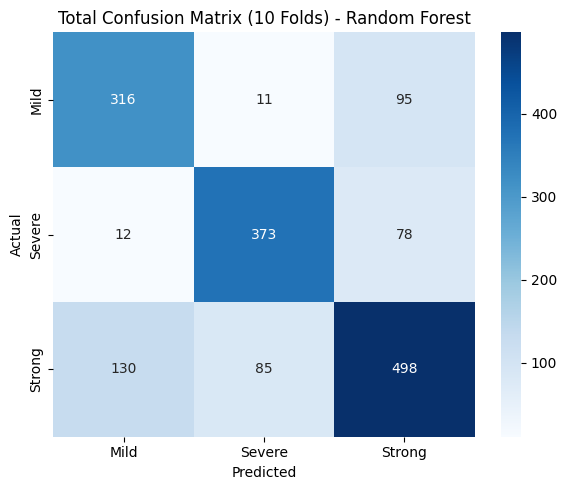

=          XGBoost           =

-- Fold 1 --
Accuracy:      0.7688
Precision:     0.7669
Recall:        0.7891 (Sensitivity)
Specificity:   0.8829
F1 Score:      0.7736

Classification Report:
              precision    recall  f1-score   support

        Mild       0.74      0.81      0.78        43
      Severe       0.76      0.89      0.82        46
      Strong       0.80      0.66      0.72        71

    accuracy                           0.77       160
   macro avg       0.77      0.79      0.77       160
weighted avg       0.77      0.77      0.77       160



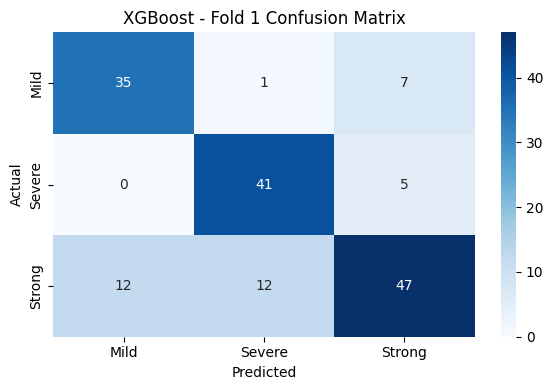


-- Fold 2 --
Accuracy:      0.7750
Precision:     0.7719
Recall:        0.7887 (Sensitivity)
Specificity:   0.8858
F1 Score:      0.7779

Classification Report:
              precision    recall  f1-score   support

        Mild       0.74      0.81      0.78        43
      Severe       0.76      0.85      0.80        46
      Strong       0.81      0.70      0.75        71

    accuracy                           0.78       160
   macro avg       0.77      0.79      0.78       160
weighted avg       0.78      0.78      0.77       160



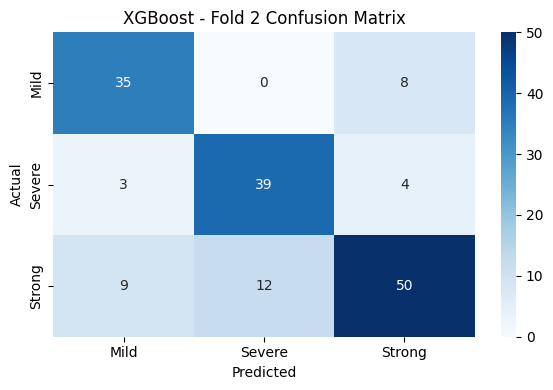


-- Fold 3 --
Accuracy:      0.7063
Precision:     0.7003
Recall:        0.7122 (Sensitivity)
Specificity:   0.8487
F1 Score:      0.7022

Classification Report:
              precision    recall  f1-score   support

        Mild       0.66      0.60      0.62        42
      Severe       0.72      0.89      0.80        47
      Strong       0.72      0.65      0.68        71

    accuracy                           0.71       160
   macro avg       0.70      0.71      0.70       160
weighted avg       0.70      0.71      0.70       160



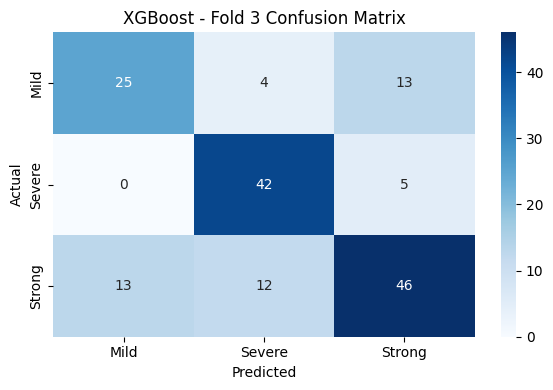


-- Fold 4 --
Accuracy:      0.7250
Precision:     0.7249
Recall:        0.7370 (Sensitivity)
Specificity:   0.8588
F1 Score:      0.7289

Classification Report:
              precision    recall  f1-score   support

        Mild       0.65      0.76      0.70        42
      Severe       0.79      0.79      0.79        47
      Strong       0.73      0.66      0.70        71

    accuracy                           0.72       160
   macro avg       0.72      0.74      0.73       160
weighted avg       0.73      0.72      0.72       160



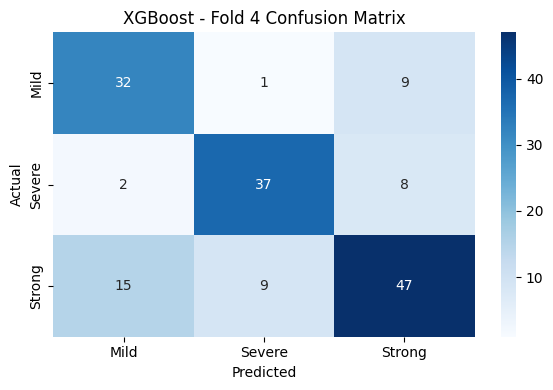


-- Fold 5 --
Accuracy:      0.6813
Precision:     0.6845
Recall:        0.6929 (Sensitivity)
Specificity:   0.8333
F1 Score:      0.6881

Classification Report:
              precision    recall  f1-score   support

        Mild       0.65      0.71      0.68        42
      Severe       0.74      0.74      0.74        47
      Strong       0.66      0.62      0.64        71

    accuracy                           0.68       160
   macro avg       0.68      0.69      0.69       160
weighted avg       0.68      0.68      0.68       160



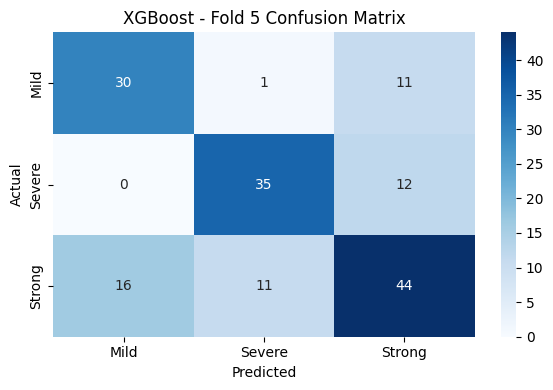


-- Fold 6 --
Accuracy:      0.7312
Precision:     0.7363
Recall:        0.7245 (Sensitivity)
Specificity:   0.8557
F1 Score:      0.7297

Classification Report:
              precision    recall  f1-score   support

        Mild       0.67      0.62      0.64        42
      Severe       0.84      0.80      0.82        46
      Strong       0.70      0.75      0.72        72

    accuracy                           0.73       160
   macro avg       0.74      0.72      0.73       160
weighted avg       0.73      0.73      0.73       160



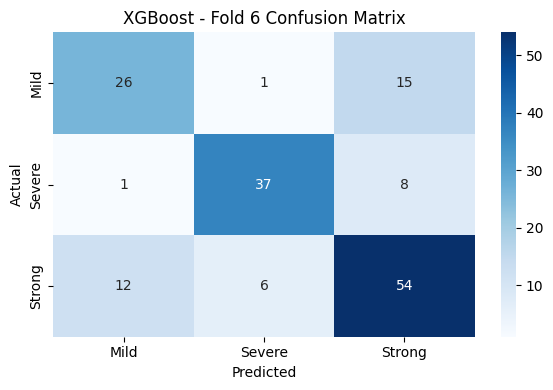


-- Fold 7 --
Accuracy:      0.7500
Precision:     0.7509
Recall:        0.7800 (Sensitivity)
Specificity:   0.8753
F1 Score:      0.7561

Classification Report:
              precision    recall  f1-score   support

        Mild       0.67      0.88      0.76        42
      Severe       0.78      0.85      0.81        46
      Strong       0.80      0.61      0.69        72

    accuracy                           0.75       160
   macro avg       0.75      0.78      0.76       160
weighted avg       0.76      0.75      0.75       160



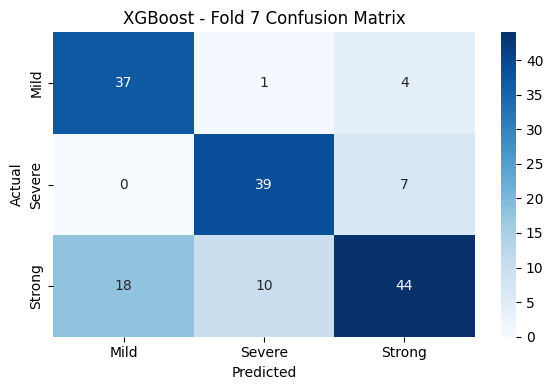


-- Fold 8 --
Accuracy:      0.7312
Precision:     0.7316
Recall:        0.7542 (Sensitivity)
Specificity:   0.8649
F1 Score:      0.7362

Classification Report:
              precision    recall  f1-score   support

        Mild       0.65      0.83      0.73        42
      Severe       0.77      0.80      0.79        46
      Strong       0.78      0.62      0.69        72

    accuracy                           0.73       160
   macro avg       0.73      0.75      0.74       160
weighted avg       0.74      0.73      0.73       160



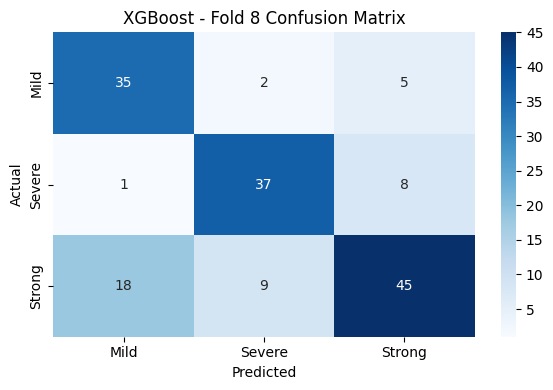


-- Fold 9 --
Accuracy:      0.7107
Precision:     0.7079
Recall:        0.7157 (Sensitivity)
Specificity:   0.8500
F1 Score:      0.7113

Classification Report:
              precision    recall  f1-score   support

        Mild       0.64      0.67      0.65        42
      Severe       0.77      0.80      0.79        46
      Strong       0.72      0.68      0.70        71

    accuracy                           0.71       159
   macro avg       0.71      0.72      0.71       159
weighted avg       0.71      0.71      0.71       159



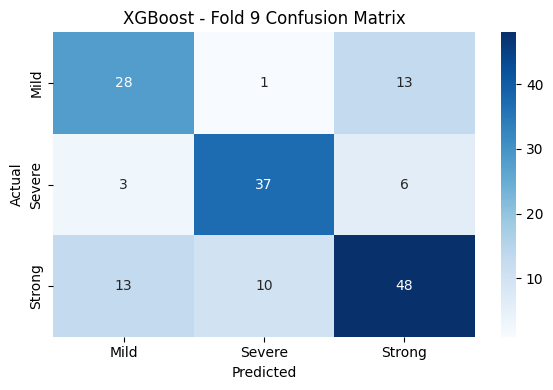


-- Fold 10 --
Accuracy:      0.7421
Precision:     0.7584
Recall:        0.7568 (Sensitivity)
Specificity:   0.8696
F1 Score:      0.7484

Classification Report:
              precision    recall  f1-score   support

        Mild       0.60      0.83      0.70        42
      Severe       0.90      0.76      0.82        46
      Strong       0.77      0.68      0.72        71

    accuracy                           0.74       159
   macro avg       0.76      0.76      0.75       159
weighted avg       0.76      0.74      0.75       159



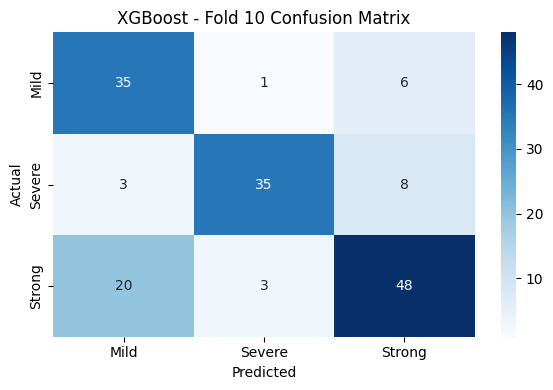

=          XGBoost           =
Average Accuracy:      0.7322
Average Precision:     0.7334
Average Recall:        0.7451 (Sensitivity)
Average Specificity:   0.8625
Average F1 Score:      0.7353

Classification Report:
             precision recall specificity f1-score support
Mild              0.67   0.75        0.86     0.71  422.00
Severe            0.78   0.82        0.91     0.80  463.00
Strong            0.74   0.66        0.82     0.70  713.00
                                                          
accuracy          0.73   0.73        0.73     0.73    0.73
macro avg         0.73   0.75        0.86     0.74 1598.00
weighted avg      0.73   0.73        0.86     0.73 1598.00


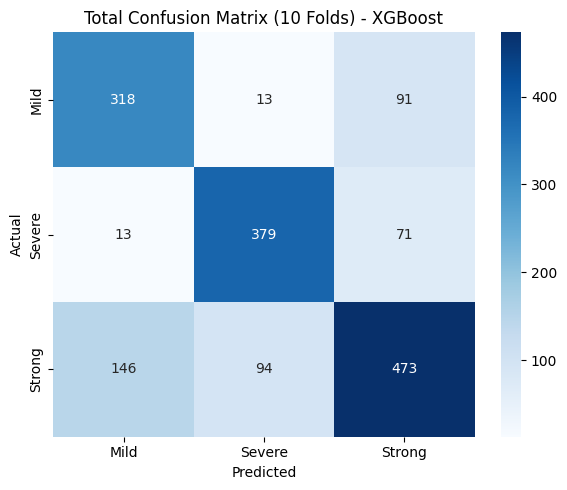

=     K-Nearest Neighbor     =

-- Fold 1 --
Accuracy:      0.6625
Precision:     0.6656
Recall:        0.6720 (Sensitivity)
Specificity:   0.8249
F1 Score:      0.6656

Classification Report:
              precision    recall  f1-score   support

        Mild       0.69      0.63      0.66        43
      Severe       0.64      0.78      0.71        46
      Strong       0.66      0.61      0.63        71

    accuracy                           0.66       160
   macro avg       0.67      0.67      0.67       160
weighted avg       0.66      0.66      0.66       160



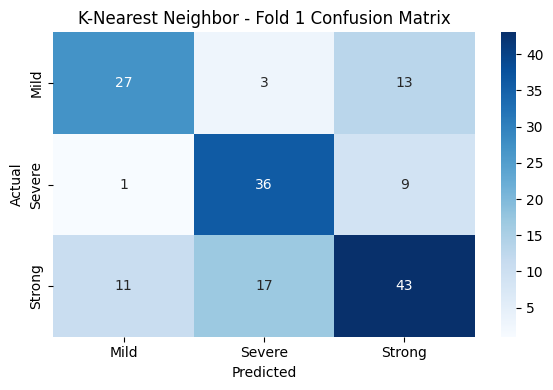


-- Fold 2 --
Accuracy:      0.7125
Precision:     0.7198
Recall:        0.7137 (Sensitivity)
Specificity:   0.8488
F1 Score:      0.7099

Classification Report:
              precision    recall  f1-score   support

        Mild       0.76      0.58      0.66        43
      Severe       0.70      0.87      0.78        46
      Strong       0.70      0.69      0.70        71

    accuracy                           0.71       160
   macro avg       0.72      0.71      0.71       160
weighted avg       0.72      0.71      0.71       160



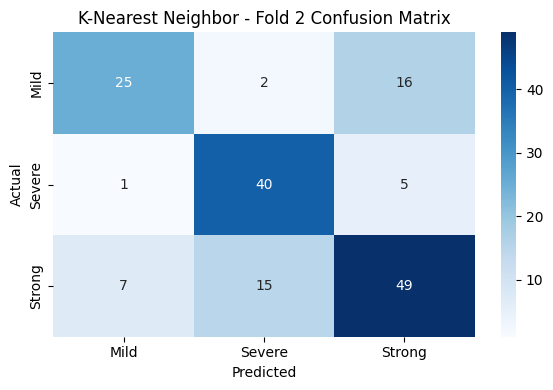


-- Fold 3 --
Accuracy:      0.7312
Precision:     0.7412
Recall:        0.7116 (Sensitivity)
Specificity:   0.8548
F1 Score:      0.7108

Classification Report:
              precision    recall  f1-score   support

        Mild       0.76      0.45      0.57        42
      Severe       0.76      0.89      0.82        47
      Strong       0.70      0.79      0.74        71

    accuracy                           0.73       160
   macro avg       0.74      0.71      0.71       160
weighted avg       0.73      0.73      0.72       160



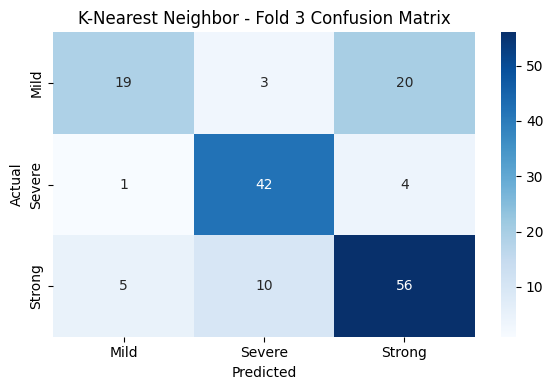


-- Fold 4 --
Accuracy:      0.6625
Precision:     0.6612
Recall:        0.6568 (Sensitivity)
Specificity:   0.8209
F1 Score:      0.6562

Classification Report:
              precision    recall  f1-score   support

        Mild       0.62      0.50      0.55        42
      Severe       0.73      0.81      0.77        47
      Strong       0.64      0.66      0.65        71

    accuracy                           0.66       160
   macro avg       0.66      0.66      0.66       160
weighted avg       0.66      0.66      0.66       160



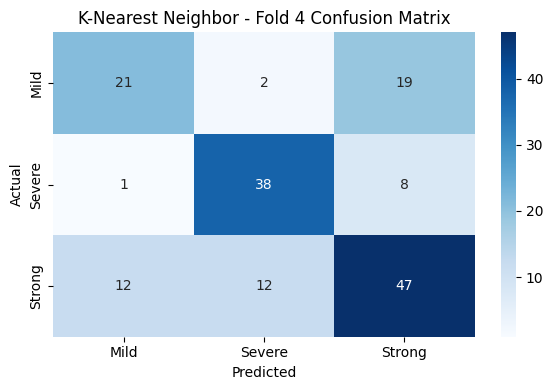


-- Fold 5 --
Accuracy:      0.6250
Precision:     0.6400
Recall:        0.6045 (Sensitivity)
Specificity:   0.7956
F1 Score:      0.6131

Classification Report:
              precision    recall  f1-score   support

        Mild       0.64      0.43      0.51        42
      Severe       0.70      0.68      0.69        47
      Strong       0.58      0.70      0.64        71

    accuracy                           0.62       160
   macro avg       0.64      0.60      0.61       160
weighted avg       0.63      0.62      0.62       160



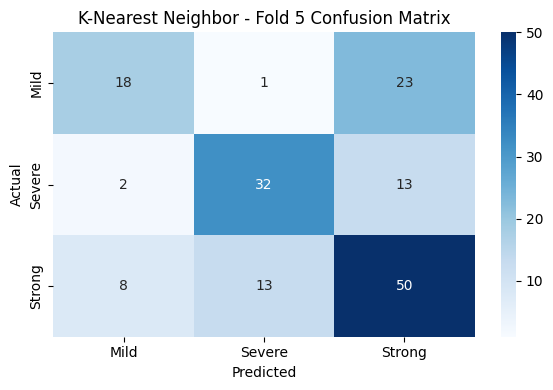


-- Fold 6 --
Accuracy:      0.6625
Precision:     0.6777
Recall:        0.6340 (Sensitivity)
Specificity:   0.8136
F1 Score:      0.6441

Classification Report:
              precision    recall  f1-score   support

        Mild       0.67      0.43      0.52        42
      Severe       0.74      0.70      0.72        46
      Strong       0.62      0.78      0.69        72

    accuracy                           0.66       160
   macro avg       0.68      0.63      0.64       160
weighted avg       0.67      0.66      0.65       160



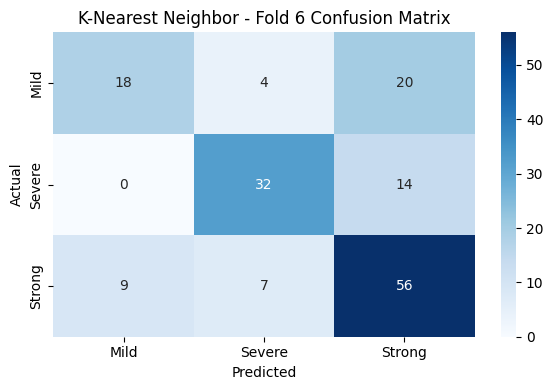


-- Fold 7 --
Accuracy:      0.7063
Precision:     0.7114
Recall:        0.7284 (Sensitivity)
Specificity:   0.8529
F1 Score:      0.7123

Classification Report:
              precision    recall  f1-score   support

        Mild       0.57      0.76      0.65        42
      Severe       0.81      0.83      0.82        46
      Strong       0.75      0.60      0.67        72

    accuracy                           0.71       160
   macro avg       0.71      0.73      0.71       160
weighted avg       0.72      0.71      0.71       160



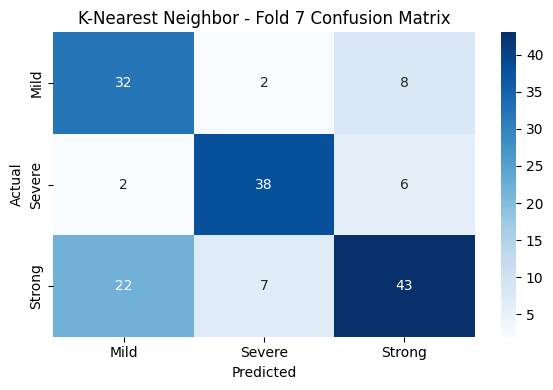


-- Fold 8 --
Accuracy:      0.6562
Precision:     0.6505
Recall:        0.6550 (Sensitivity)
Specificity:   0.8184
F1 Score:      0.6519

Classification Report:
              precision    recall  f1-score   support

        Mild       0.55      0.50      0.53        42
      Severe       0.76      0.83      0.79        46
      Strong       0.64      0.64      0.64        72

    accuracy                           0.66       160
   macro avg       0.65      0.65      0.65       160
weighted avg       0.65      0.66      0.65       160



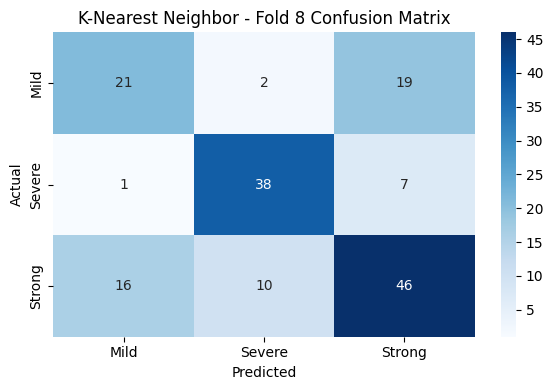


-- Fold 9 --
Accuracy:      0.7484
Precision:     0.7440
Recall:        0.7497 (Sensitivity)
Specificity:   0.8705
F1 Score:      0.7455

Classification Report:
              precision    recall  f1-score   support

        Mild       0.72      0.69      0.71        42
      Severe       0.73      0.83      0.78        46
      Strong       0.78      0.73      0.75        71

    accuracy                           0.75       159
   macro avg       0.74      0.75      0.75       159
weighted avg       0.75      0.75      0.75       159



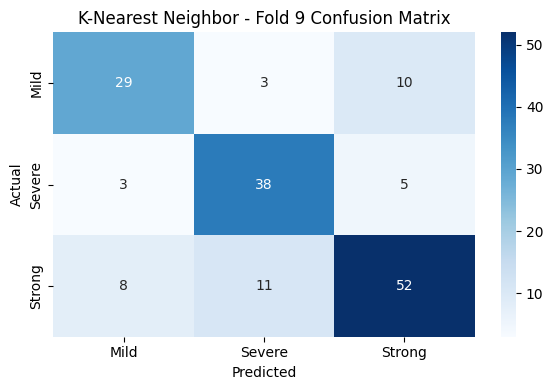


-- Fold 10 --
Accuracy:      0.6478
Precision:     0.6478
Recall:        0.6442 (Sensitivity)
Specificity:   0.8161
F1 Score:      0.6458

Classification Report:
              precision    recall  f1-score   support

        Mild       0.50      0.52      0.51        42
      Severe       0.80      0.76      0.78        46
      Strong       0.65      0.65      0.65        71

    accuracy                           0.65       159
   macro avg       0.65      0.64      0.65       159
weighted avg       0.65      0.65      0.65       159



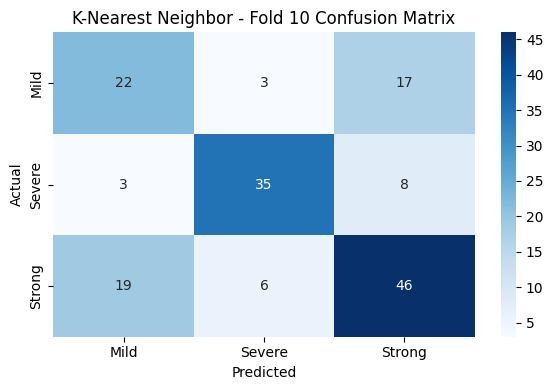

=     K-Nearest Neighbor     =
Average Accuracy:      0.6815
Average Precision:     0.6859
Average Recall:        0.6770 (Sensitivity)
Average Specificity:   0.8317
Average F1 Score:      0.6755

Classification Report:
             precision recall specificity f1-score support
Mild              0.64   0.55        0.89     0.59  422.00
Severe            0.74   0.80        0.88     0.76  463.00
Strong            0.67   0.68        0.72     0.68  713.00
                                                          
accuracy          0.68   0.68        0.68     0.68    0.68
macro avg         0.68   0.68        0.83     0.68 1598.00
weighted avg      0.68   0.68        0.81     0.68 1598.00


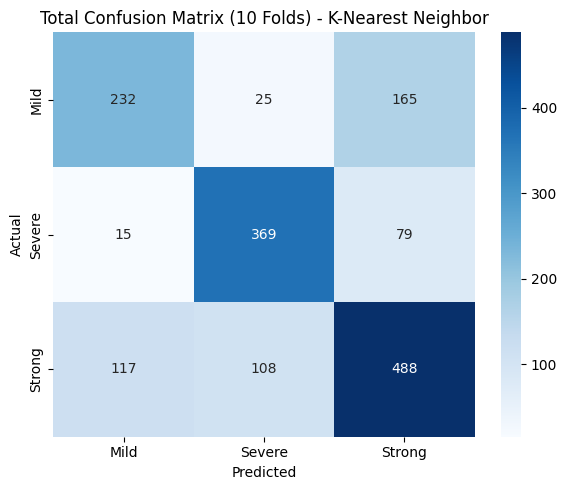

In [6]:
for name, clf in classifiers.items():
    print("=" * 30)
    print(f"= {name.center(26)} =")
    print("=" * 30)
    fold = 1

    all_y_true = []
    all_y_pred = []

    for train_idx, test_idx in skf.split(X, y):
        print(f"\n-- Fold {fold} --")
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        all_y_true.extend(y_test)
        all_y_pred.extend(y_pred)

        cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))
        conf_matrices[name] += cm

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
        rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

        specificity_list = []
        for i in range(len(cm)):
            tn = cm.sum() - (cm[i, :].sum() + cm[:, i].sum() - cm[i, i])
            fp = cm[:, i].sum() - cm[i, i]
            specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
            specificity_list.append(specificity)
        specificity = np.mean(specificity_list)

        results[name]["accuracy"].append(acc)
        results[name]["precision"].append(prec)
        results[name]["recall"].append(rec)
        results[name]["specificity"].append(specificity)
        results[name]["f1"].append(f1)

        print(f"Accuracy:      {acc:.4f}")
        print(f"Precision:     {prec:.4f}")
        print(f"Recall:        {rec:.4f} (Sensitivity)")
        print(f"Specificity:   {specificity:.4f}")
        print(f"F1 Score:      {f1:.4f}")

        print("\nClassification Report:")
        print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                    xticklabels=label_encoder.classes_,
                    yticklabels=label_encoder.classes_)
        plt.title(f"{name} - Fold {fold} Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.tight_layout()
        plt.show()

        fold += 1

    print("=" * 30)
    print(f"= {name.center(26)} =")
    print("=" * 30)
    print(f"Average Accuracy:      {np.mean(results[name]['accuracy']):.4f}")
    print(f"Average Precision:     {np.mean(results[name]['precision']):.4f}")
    print(f"Average Recall:        {np.mean(results[name]['recall']):.4f} (Sensitivity)")
    print(f"Average Specificity:   {np.mean(results[name]['specificity']):.4f}")
    print(f"Average F1 Score:      {np.mean(results[name]['f1']):.4f}")

    total_cm = conf_matrices[name].astype(int)
    print("\nClassification Report:")
    report_dict = classification_report(all_y_true, all_y_pred, target_names=label_encoder.classes_, output_dict=True)

    specificities = {}
    for i, class_name in enumerate(label_encoder.classes_):
        tn = total_cm.sum() - (total_cm[i, :].sum() + total_cm[:, i].sum() - total_cm[i, i])
        fp = total_cm[:, i].sum() - total_cm[i, i]
        specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
        specificities[class_name] = specificity

    for class_name in label_encoder.classes_:
        report_dict[class_name]['specificity'] = specificities[class_name]

    macro_avg_specificity = np.mean(list(specificities.values()))
    report_dict['macro avg']['specificity'] = macro_avg_specificity

    weighted_specificity = 0
    total_support = 0
    for class_name in label_encoder.classes_:
        support = report_dict[class_name]['support']
        total_support += support
        weighted_specificity += specificities[class_name] * support
    report_dict['weighted avg']['specificity'] = weighted_specificity / total_support

    report_df = pd.DataFrame(report_dict).T
    report_df = report_df[['precision', 'recall', 'specificity', 'f1-score', 'support']]
    blank_row = pd.DataFrame([[""] * len(report_df.columns)], columns=report_df.columns, index=[""])
    report_df = pd.concat([report_df.loc[label_encoder.classes_], blank_row, report_df.drop(label_encoder.classes_)])
    
    pd.set_option('display.float_format', '{:.2f}'.format)
    print(report_df)


    plt.figure(figsize=(6, 5))
    sns.heatmap(total_cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title(f"Total Confusion Matrix (10 Folds) - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

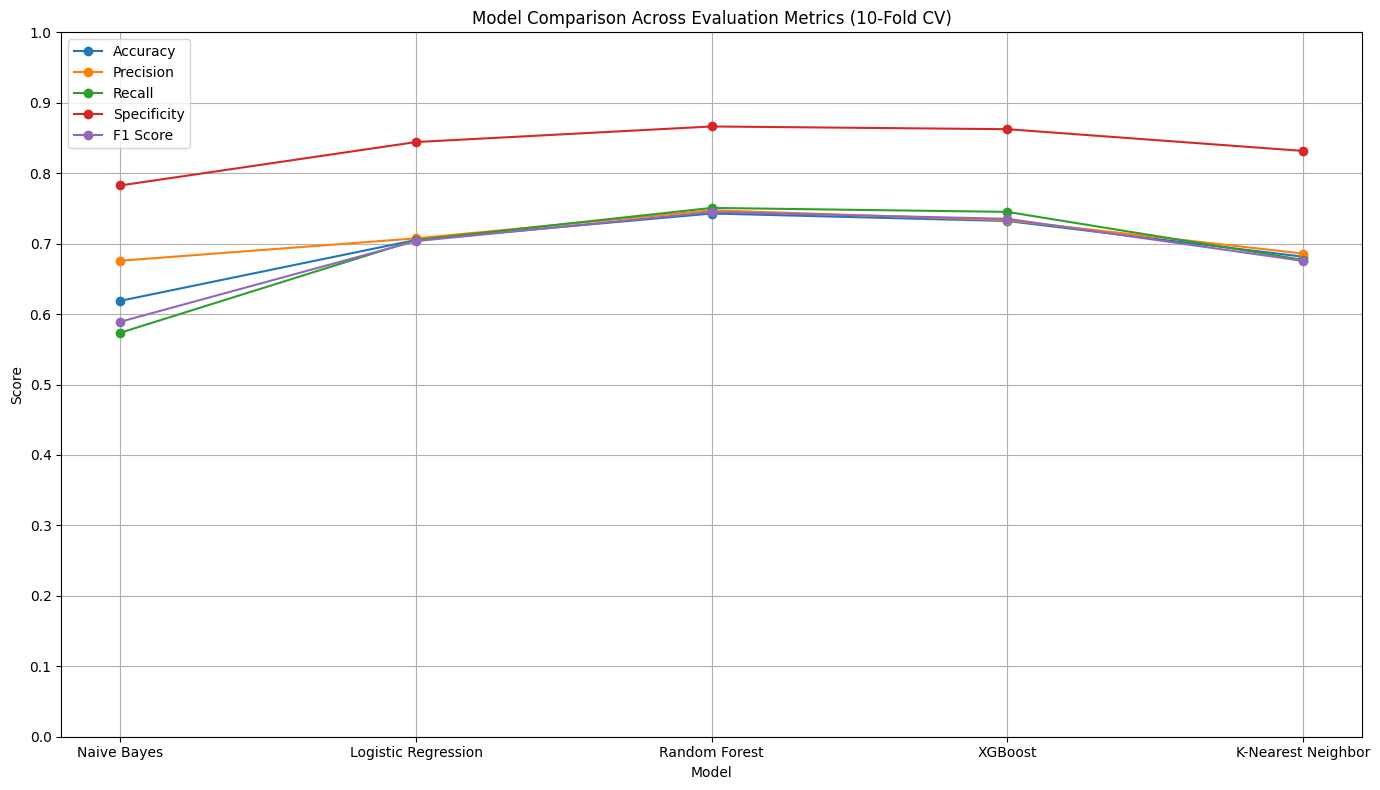

In [7]:
# Average the metrics only if values exist
metrics_summary = {
    name: {
        "Accuracy": np.mean(metrics["accuracy"]) if metrics["accuracy"] else 0,
        "Precision": np.mean(metrics["precision"]) if metrics["precision"] else 0,
        "Recall": np.mean(metrics["recall"]) if metrics["recall"] else 0,
        "Specificity": np.mean(metrics["specificity"]) if metrics["specificity"] else 0,
        "F1 Score": np.mean(metrics["f1"]) if metrics["f1"] else 0,
    }
    for name, metrics in results.items()
}

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics_summary).T.reset_index().rename(columns={"index": "Model"})

# Plot average metrics
plt.figure(figsize=(14, 8))
for metric in ["Accuracy", "Precision", "Recall", "Specificity", "F1 Score"]:
    plt.plot(metrics_df["Model"], metrics_df[metric], marker='o', label=metric)

plt.title("Model Comparison Across Evaluation Metrics (10-Fold CV)")
plt.xlabel("Model")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.yticks(np.arange(0.0, 1.01, 0.1))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

